<a href="https://colab.research.google.com/github/Terence0408/Teach_code/blob/master/Deep_Learning_Python_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


# Load package

Tutorial: https://www.tensorflow.org/tutorials/keras


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import datasets
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Regression


## Data

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

Reg_data = pd.read_csv(url, names=column_names,
                       na_values='?', comment='\t',
                       sep=' ', skipinitialspace=True)

Reg_data = Reg_data.dropna()

Reg_data['Origin'] = Reg_data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
Reg_data = pd.get_dummies(Reg_data, columns=['Origin'], prefix='', prefix_sep='')

In [4]:
X = Reg_data.iloc[:,1:9]
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,0,0
1,8,350.0,165.0,3693.0,11.5,70,0,0
2,8,318.0,150.0,3436.0,11.0,70,0,0
3,8,304.0,150.0,3433.0,12.0,70,0,0
4,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,0,0
394,4,97.0,52.0,2130.0,24.6,82,1,0
395,4,135.0,84.0,2295.0,11.6,82,0,0
396,4,120.0,79.0,2625.0,18.6,82,0,0


In [5]:
y = Reg_data.iloc[:,0:1]

# normalize
y = y / np.max(y)

y

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,MPG
0,0.386266
1,0.321888
2,0.386266
3,0.343348
4,0.364807
...,...
393,0.579399
394,0.944206
395,0.686695
396,0.600858


## Model

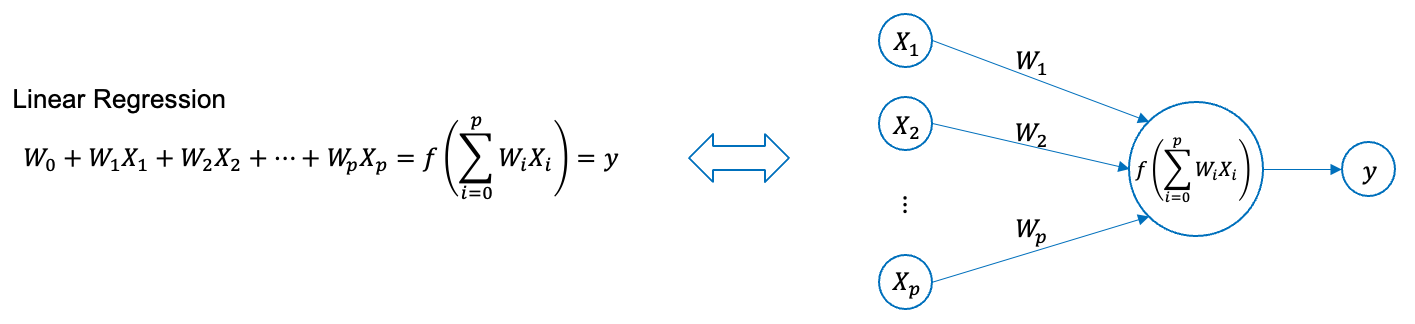




In [6]:
# Build the Keras Sequential model
Reg_model = keras.models.Sequential()

Reg_model.add(keras.layers.Dense(input_shape=(X.shape[1],), # input features
                                 units = 1)) # output features


# Compiling the model
Reg_model.compile(optimizer='adam',
                  loss='mean_squared_error')


Reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Evalute the model
Reg_history = Reg_model.fit(x = X,
                            y = y,
                            epochs = 500,
                            verbose = 1,
                            validation_split = 0.2,
                            shuffle = True)

Epoch 1/500
10/10 [==============================] - 7s 45ms/step - loss: 775999.8750 - val_loss: 406558.4688
Epoch 2/500
10/10 [==============================] - 0s 25ms/step - loss: 712936.0625 - val_loss: 371917.5312
Epoch 3/500
10/10 [==============================] - 0s 13ms/step - loss: 653481.1875 - val_loss: 339170.9375
Epoch 4/500
10/10 [==============================] - 0s 10ms/step - loss: 598793.1250 - val_loss: 308033.5625
Epoch 5/500
10/10 [==============================] - 0s 24ms/step - loss: 545201.6875 - val_loss: 279493.0000
Epoch 6/500
10/10 [==============================] - 0s 20ms/step - loss: 496685.1875 - val_loss: 252762.2344
Epoch 7/500
10/10 [==============================] - 0s 14ms/step - loss: 450991.1250 - val_loss: 228028.4375
Epoch 8/500
10/10 [==============================] - 0s 13ms/step - loss: 409613.0000 - val_loss: 204845.9844
Epoch 9/500
10/10 [==============================] - 0s 18ms/step - loss: 369172.9375 - val_loss: 184190.7031
Epoch 10/5

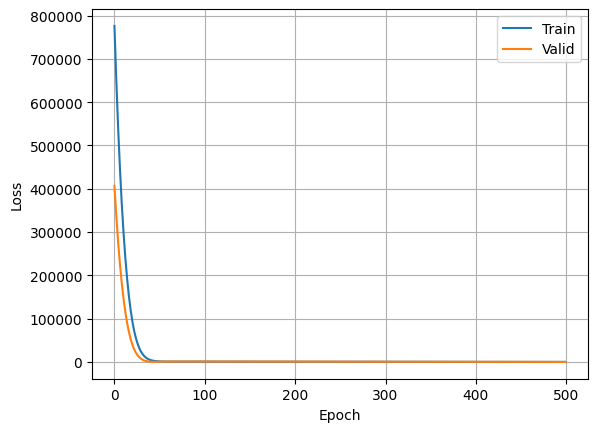

In [8]:
plt.plot(Reg_history.history['loss'], label='Train')
plt.plot(Reg_history.history['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

## Prediction

In [9]:
y_pred = Reg_model.predict(X)
y_pred = pd.DataFrame(y_pred, columns = ['diabetes'])
y_pred

13/13 [==============================] - 0s 2ms/step


,diabetes
0,-4.255482
1,10.697197
2,11.661308
3,12.679766
4,6.585943
...,...
387,6.982471
388,-2.853152
389,23.704254
390,6.418976


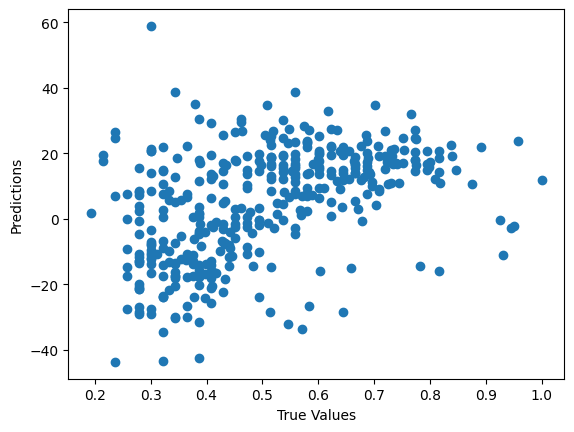

In [10]:
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Logistic regression

## Data

In [11]:
Logist_data = datasets.load_iris()

In [12]:
X = pd.DataFrame(Logist_data['data'],columns = Logist_data['feature_names'])

print(X.shape[1])
X

4


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y = Logist_data['target']
y = keras.utils.to_categorical(y, np.max(y)+1)
y = pd.DataFrame(y, columns = Logist_data['target_names'])

print(y.shape[1])
y

3


,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


## Model

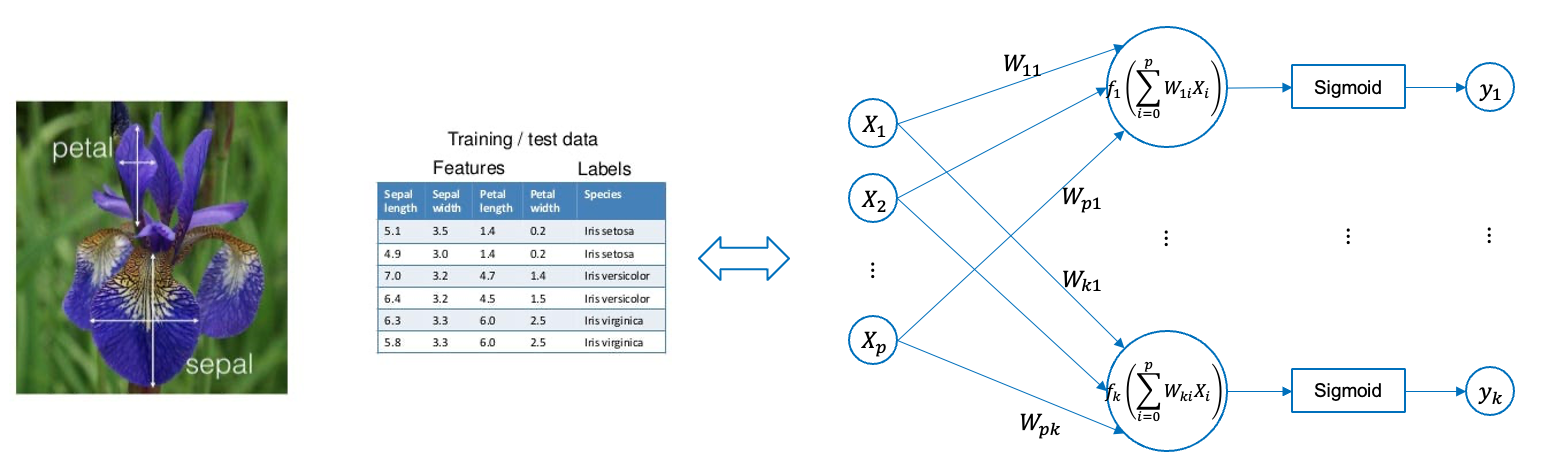

In [14]:
# Build the Keras Sequential model
Logist_model = keras.models.Sequential()

Logist_model.add(keras.layers.Dense(input_shape=(X.shape[1],), # input features
                                    activation='softmax', # convert to [0,1]
                                    units = y.shape[1])) # output features

# Compiling the model
Logist_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

Logist_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Evalute the model
Logist_history = Logist_model.fit(x = X,
                                  y = y,
                                  epochs = 500,
                                  verbose = 1,
                                  validation_split = 0.2,
                                  shuffle = True)

Epoch 1/500
4/4 [==============================] - 1s 82ms/step - loss: 3.1288 - accuracy: 0.1667 - val_loss: 8.7205e-04 - val_accuracy: 1.0000
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 3.0770 - accuracy: 0.1667 - val_loss: 9.8743e-04 - val_accuracy: 1.0000
Epoch 3/500
4/4 [==============================] - 0s 15ms/step - loss: 3.0235 - accuracy: 0.1667 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/500
4/4 [==============================] - 0s 20ms/step - loss: 2.9718 - accuracy: 0.1667 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/500
4/4 [==============================] - 0s 21ms/step - loss: 2.9171 - accuracy: 0.1667 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 2.8634 - accuracy: 0.1667 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/500
4/4 [==============================] - 0s 16ms/step - loss: 2.8129 - accuracy: 0.1667 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/500


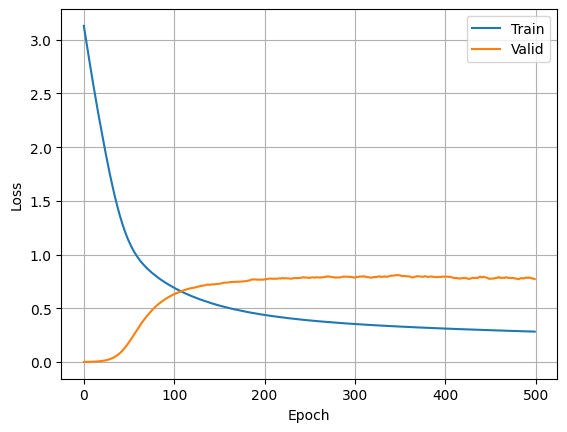

In [16]:
plt.plot(Logist_history.history['loss'], label='Train')
plt.plot(Logist_history.history['val_loss'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

## Prediction

In [17]:
y_pred = Logist_model.predict(X)
y_pred = pd.DataFrame(y_pred,columns = Logist_data['target_names'])
y_pred

5/5 [==============================] - 0s 2ms/step


,setosa,versicolor,virginica
0,0.934750,0.064755,0.000495
1,0.882067,0.116282,0.001650
2,0.920845,0.078257,0.000897
3,0.881479,0.116775,0.001746
4,0.942792,0.056806,0.000403
...,...,...,...
145,0.010876,0.480135,0.508988
146,0.007175,0.465442,0.527383
147,0.012047,0.554764,0.433189
148,0.014918,0.514932,0.470149


In [18]:
confusion_matrix(np.argmax(y.to_numpy(),axis=1), np.argmax(y_pred.to_numpy(),axis=1))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 21, 29]])

# MLP

## Data

In [68]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

Reg_data = pd.read_csv(url, names=column_names,
                       na_values='?', comment='\t',
                       sep=' ', skipinitialspace=True)

Reg_data = Reg_data.dropna()

Reg_data['Origin'] = Reg_data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
Reg_data = pd.get_dummies(Reg_data, columns=['Origin'], prefix='', prefix_sep='')

In [67]:
X = Reg_data.iloc[:,1:9]
X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,0,0
1,8,350.0,165.0,3693.0,11.5,70,0,0
2,8,318.0,150.0,3436.0,11.0,70,0,0
3,8,304.0,150.0,3433.0,12.0,70,0,0
4,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,0,0
394,4,97.0,52.0,2130.0,24.6,82,1,0
395,4,135.0,84.0,2295.0,11.6,82,0,0
396,4,120.0,79.0,2625.0,18.6,82,0,0


In [69]:
y = Reg_data.iloc[:,0:1]

# normalize
y = y / np.max(y)

y

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,MPG
0,0.386266
1,0.321888
2,0.386266
3,0.343348
4,0.364807
...,...
393,0.579399
394,0.944206
395,0.686695
396,0.600858


## Model

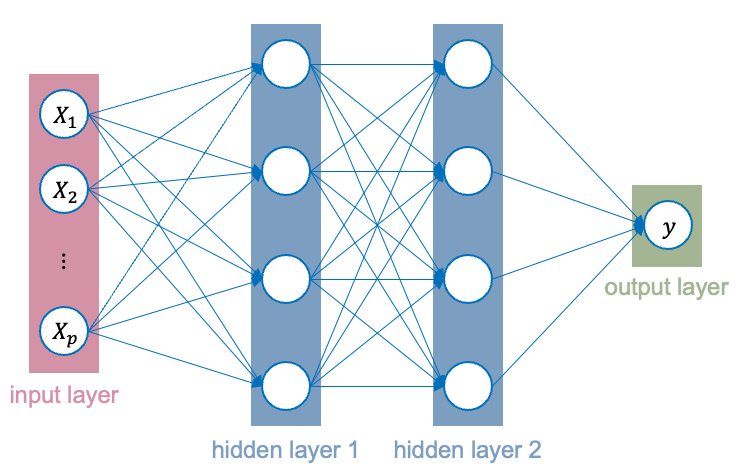

In [20]:
# Build the Keras Sequential model
MLP_model = keras.models.Sequential()

MLP_model.add(keras.layers.Dense(input_shape=(X.shape[1],), # input features
                                 units = 4))
MLP_model.add(keras.layers.Dense(units = 4))
MLP_model.add(keras.layers.Dense(units = 1))


# Compiling the model
MLP_model.compile(optimizer='adam',
                  loss='mean_squared_error')


MLP_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Evalute the model
MLP_history = MLP_model.fit(x = X,
                            y = y,
                            epochs = 500,
                            verbose = 1,
                            validation_split = 0.2,
                            shuffle = True)

Epoch 1/500
10/10 [==============================] - 1s 17ms/step - loss: 425089.6250 - val_loss: 130049.2891
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 207531.1250 - val_loss: 46216.2734
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 80766.6562 - val_loss: 8930.7021
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 23301.9512 - val_loss: 1079.8119
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 6306.9526 - val_loss: 4249.0728
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 4547.4243 - val_loss: 7166.5054
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 4895.5669 - val_loss: 7229.7676
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 4684.4570 - val_loss: 5981.3232
Epoch 9/500
10/10 [==============================] - 0s 7ms/step - loss: 4329.3623 - val_loss: 4970.4849
Epoch 10/500
10/10 [=========================

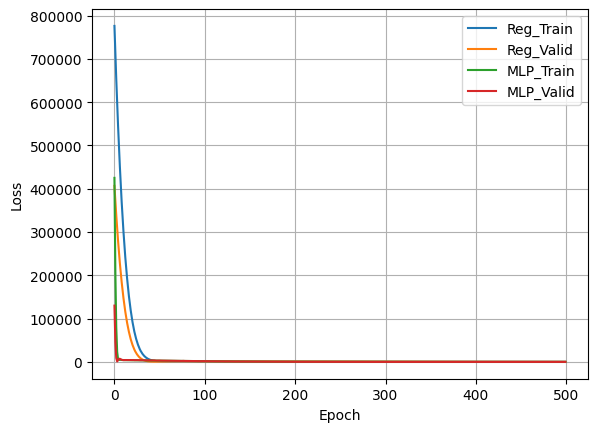

In [22]:
plt.plot(Reg_history.history['loss'], label='Reg_Train')
plt.plot(Reg_history.history['val_loss'], label='Reg_Valid')

plt.plot(MLP_history.history['loss'], label='MLP_Train')
plt.plot(MLP_history.history['val_loss'], label='MLP_Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

## Model with EarlyStopping

https://keras.io/api/callbacks/

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [23]:
# Build the Keras Sequential model
MLP_model_EarlyStopping = keras.models.Sequential()

MLP_model_EarlyStopping.add(keras.layers.Dense(input_shape=(X.shape[1],), # input features
                            units = 4))
MLP_model_EarlyStopping.add(keras.layers.Dense(units = 4))
MLP_model_EarlyStopping.add(keras.layers.Dense(units = 1))


# Compiling the model
MLP_model_EarlyStopping.compile(optimizer='adam',
                  loss='mean_squared_error')


MLP_model_EarlyStopping.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
callbacks = [
  # Write TensorBoard logs to './logs' directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs'),
  # Stop training when a monitored metric has stopped improving.
  tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
]

# Evalute the model with callback(earlystop)
MLP_EarlyStopping_history = MLP_model_EarlyStopping.fit(x = X,
                                                        y = y,
                                                        epochs = 500,
                                                        verbose = 1,
                                                        validation_split = 0.2,
                                                        shuffle = True,
                                                        callbacks = callbacks)

Epoch 1/500
10/10 [==============================] - 1s 28ms/step - loss: 2874156.7500 - val_loss: 1402350.5000
Epoch 2/500
10/10 [==============================] - 0s 10ms/step - loss: 2166604.2500 - val_loss: 1032296.3125
Epoch 3/500
10/10 [==============================] - 0s 10ms/step - loss: 1585792.8750 - val_loss: 742002.0000
Epoch 4/500
10/10 [==============================] - 0s 10ms/step - loss: 1146207.8750 - val_loss: 516269.2188
Epoch 5/500
10/10 [==============================] - 0s 10ms/step - loss: 797505.0000 - val_loss: 350504.9062
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 544737.5000 - val_loss: 229127.8281
Epoch 7/500
10/10 [==============================] - 0s 10ms/step - loss: 360188.8750 - val_loss: 143508.0938
Epoch 8/500
10/10 [==============================] - 0s 10ms/step - loss: 231307.2188 - val_loss: 85207.4297
Epoch 9/500
10/10 [==============================] - 0s 12ms/step - loss: 141049.3438 - val_loss: 48084.6133
Epoch 1

## Prediction

13/13 [==============================] - 0s 3ms/step


(0.0, 1.0)

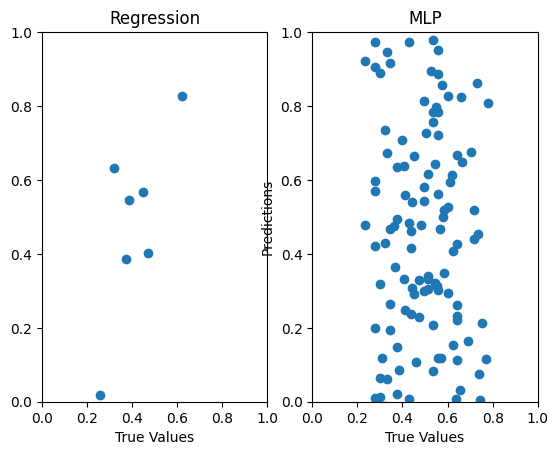

In [39]:
y_pred_Reg = Reg_model.predict(X)
y_pred_Reg = pd.DataFrame(y_pred_Reg, columns = ['diabetes'])

y_pred_MLP = MLP_model.predict(X)
y_pred_MLP = pd.DataFrame(y_pred_MLP, columns = ['diabetes'])


fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.scatter(y, y_pred_Reg)
ax1.set_title('Regression')
ax1.set_xlabel('True Values')
ax1.set_ylabel('')
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

ax2 = fig.add_subplot(122)
ax2.scatter(y, y_pred_MLP)
ax2.set_title('MLP')
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predictions')
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

# Save and Load model

In [26]:
# Save the weights
MLP_model.save_weights('./checkpoints/my_checkpoint')

# Restore the weights
MLP_model.load_weights('./checkpoints/my_checkpoint')

In [27]:
# Save the entire model as a `.keras` zip archive.
MLP_model.save('./my_model.keras')

# Load the entire model
MLP_model = tf.keras.models.load_model('./my_model.keras')

# CNN
Convolutional Neural Networks














## Data

In [28]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


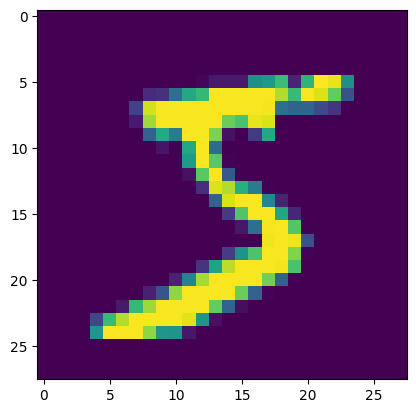

In [29]:
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape)
plt.imshow(X_train[0])

In [30]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train.shape)
y_train[0]

(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model (LeNet)

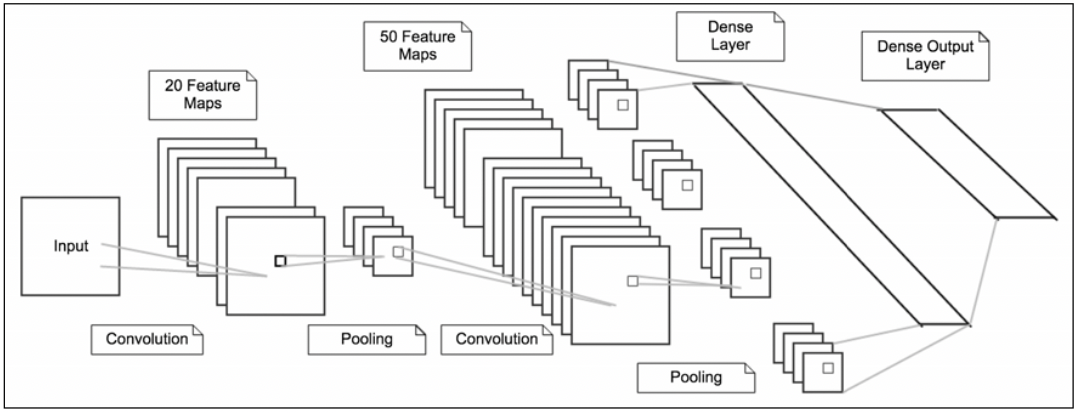

In [55]:
# Build the Keras Sequential model
LeNet_model = keras.models.Sequential()

LeNet_model.add(keras.layers.Conv2D(filters = 20, # 20 output channels (or output filters)
                                    kernel_size = (5, 5), # 5x5 convolution
                                    activation='relu',
                                    input_shape=(28, 28, 1)))
LeNet_model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))
LeNet_model.add(keras.layers.Conv2D(filters = 50, kernel_size = (5, 5),
                                    activation='relu'))
LeNet_model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))
LeNet_model.add(keras.layers.Flatten())
LeNet_model.add(keras.layers.Dense(500, activation='relu'))
LeNet_model.add(keras.layers.Dense(10, activation='softmax'))


# Compiling the model
LeNet_model.compile(loss="categorical_crossentropy", optimizer='adam',
                    metrics=["accuracy"])


LeNet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 50)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 500)              

In [56]:
# Evalute the model
LeNet_history = LeNet_model.fit(X_train,
                                y_train,
                                batch_size = 128,
                                epochs = 5,
                                verbose = 1,
                                validation_split = 0.9)

Epoch 1/5
47/47 [==============================] - 3s 40ms/step - loss: 0.7958 - accuracy: 0.7676 - val_loss: 0.2947 - val_accuracy: 0.9067
Epoch 2/5
47/47 [==============================] - 1s 29ms/step - loss: 0.1983 - accuracy: 0.9410 - val_loss: 0.1671 - val_accuracy: 0.9492
Epoch 3/5
47/47 [==============================] - 2s 33ms/step - loss: 0.1162 - accuracy: 0.9677 - val_loss: 0.1392 - val_accuracy: 0.9575
Epoch 4/5
47/47 [==============================] - 2s 33ms/step - loss: 0.0859 - accuracy: 0.9738 - val_loss: 0.1192 - val_accuracy: 0.9622
Epoch 5/5
47/47 [==============================] - 2s 34ms/step - loss: 0.0665 - accuracy: 0.9813 - val_loss: 0.1098 - val_accuracy: 0.9652


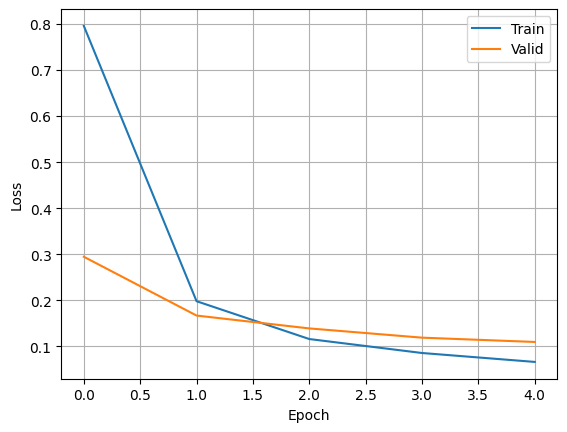

In [57]:
plt.plot(LeNet_history.history['loss'], label='Train')
plt.plot(LeNet_history.history['val_loss'], label='Valid')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [58]:
score, acc = LeNet_model.evaluate(X_test, y_test, batch_size = 32)
print("\nTest score:", score)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9682

Test score: 0.09793651849031448
Test accuracy: 0.9682000279426575


## Prediction

In [59]:
y_pred = LeNet_model.predict(X_test)
print(y_test[0])
y_pred[0]

313/313 [==============================] - 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


array([2.0874090e-07, 1.4358324e-07, 5.0117960e-05, 8.1873470e-04,
       2.5907571e-10, 1.1356900e-06, 1.2646809e-13, 9.9905962e-01,
       2.7860588e-06, 6.7193461e-05], dtype=float32)

In [60]:
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))

array([[ 972,    0,    1,    0,    0,    1,    2,    1,    3,    0],
       [   0, 1115,    1,    2,    0,    3,    1,    0,   13,    0],
       [   2,    2, 1009,    3,    0,    0,    0,    1,   15,    0],
       [   1,    0,    4,  963,    0,   27,    0,    3,   10,    2],
       [   1,    2,    3,    0,  931,    0,    3,    1,    8,   33],
       [   3,    0,    0,    2,    0,  882,    1,    1,    3,    0],
       [  12,    3,    3,    0,    4,    7,  923,    0,    6,    0],
       [   0,    4,   27,    9,    0,    1,    0,  948,   15,   24],
       [   7,    0,    0,    2,    1,    2,    1,    0,  959,    2],
       [   2,    5,    1,    1,    3,    7,    0,    4,    6,  980]])

# Augmentation

## Mdoel

In [61]:
# Build the Keras Sequential model
LeNet_Augmentation_model = keras.models.Sequential()

LeNet_Augmentation_model.add(keras.layers.Conv2D(filters = 20, # 20 output channels (or output filters)
                                    kernel_size = (5, 5), # 5x5 convolution
                                    activation='relu',
                                    input_shape=(28, 28,1)))
LeNet_Augmentation_model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))
LeNet_Augmentation_model.add(keras.layers.Conv2D(filters = 50, kernel_size = (5, 5),
                                    activation='relu'))
LeNet_Augmentation_model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))
LeNet_Augmentation_model.add(keras.layers.Flatten())
LeNet_Augmentation_model.add(keras.layers.Dense(500, activation='relu'))
LeNet_Augmentation_model.add(keras.layers.Dense(10, activation='softmax'))


# Compiling the model
LeNet_Augmentation_model.compile(loss="categorical_crossentropy", optimizer='adam',
                    metrics=["accuracy"])


LeNet_Augmentation_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 50)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_14 (Dense)            (None, 500)              

In [63]:
#image augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.9,
    data_format = 'channels_last')

datagen.fit(X_train.reshape(60000, 28, 28, 1))

In [64]:
#LeNet_history = LeNet_model.fit(X_train, y_train,batch_size = 128, ...)
LeNet_Augmentation_history = LeNet_Augmentation_model.fit(
    datagen.flow(X_train.reshape(60000, 28, 28, 1), y_train,batch_size = 128),
    epochs = 5,
    verbose = 1)
    # validation_split = 0.9, already in ImageDataGenerator

Epoch 1/5
469/469 [==============================] - 26s 50ms/step - loss: 0.7098 - accuracy: 0.7624
Epoch 2/5
469/469 [==============================] - 26s 55ms/step - loss: 0.2922 - accuracy: 0.9079
Epoch 3/5
469/469 [==============================] - 35s 75ms/step - loss: 0.2068 - accuracy: 0.9345
Epoch 4/5
469/469 [==============================] - 23s 50ms/step - loss: 0.1756 - accuracy: 0.9449
Epoch 5/5
469/469 [==============================] - 23s 49ms/step - loss: 0.1509 - accuracy: 0.9520


## Prediction

In [65]:
y_pred = LeNet_Augmentation_model.predict(X_test)
print(y_test[0])
y_pred[0]

313/313 [==============================] - 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


array([0.00836499, 0.00073965, 0.0682138 , 0.11439137, 0.00664378,
       0.06405897, 0.00441888, 0.04362315, 0.6605212 , 0.02902418],
      dtype=float32)

In [66]:
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))

array([[531,   0,   0,   0,   0,   0,   0,   0, 449,   0],
       [  0,   0,   8,   0, 267,   0,   0,  11, 849,   0],
       [  0,   0, 746,   0,   0,   0,   0,   0, 286,   0],
       [  0,   0,   0, 745,   0,   0,   0,   0, 265,   0],
       [  0,   0,   1,   0, 653,   0,   0,   0, 328,   0],
       [  0,   0,  51,  14,   0, 158,   0,   0, 669,   0],
       [  0,   0, 331,   0,   2,   0, 161,   0, 464,   0],
       [  0,   0,  10,   6,   2,   0,   0,  69, 941,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 974,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0, 984,  24]])